# **French Noun Gender Classification in Word Embeddings: SHAP & LIME Analysis on a Perceptron Model**

# Step 1: Dataset Laoding (French Nouns Embeddings)

In [19]:
!pip install gdown


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import gdown
import pandas as pd

# Define the French Nouns Embeddings files links and corresponding output file names
file_links = {
    "camem_bert_base_embeddings": "1D7jbsNIinPTapETRzWimlPyU0y8tx49P",
    "distilled_bert_base_cased": "1B_v8U57fw-fQ21PCDfUYDXgcxYRGNPIV",
    "flaubert_base_cased": "1VGs8vbTpg4OgRV7zMPwRbIo9aEYdqxC3",
    "flaubert_base_uncased": "155ScHgNyDdzkyHjV96eaT6yDFG3i-fke",
    "flaubert_large_uncased": "1sLIFHTkJ43CedB6uJBY8OVvfGbigqtV7",
    "flaubert_small_cased": "10xGIcEBfpbIdxC6kFDA4_qjxbEz_SJcT",
    "mbert_base_cased": "1ULJOGhMS7bpXruv3sS1UJLyhDFAznXVE",
    "mbert_base_uncased": "1MBTqcVxvwVPbnDBxqy7BPxx72ZOxIsw_",
    "xlmr_r_large": "1J43o7gZslJemN8HMdSPzkhENMW52wFVX",
    "xlm_roberta_base": "1MeYKcyXWpBNYhiYHMVHlwEgkWomyufxX"
}

# Dictionary to store dataframes
dataframes = {}

# Download files and load into dataframes
for name, file_id in file_links.items():
    output_file = f"{name}.csv"
    gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

    try:
        df = pd.read_csv(output_file)  # Try loading as CSV
    except Exception:
        try:
            df = pd.read_excel(output_file)  # Try loading as Excel
        except Exception:
            df = None  # If neither CSV nor Excel, set to None

    if df is not None:
        dataframes[name] = df
        print(f"Loaded {name} into dataframe with shape {df.shape}")
    else:
        print(f"Failed to load {name}, file format unknown.\n\n")


Downloading...
From: https://drive.google.com/uc?id=1D7jbsNIinPTapETRzWimlPyU0y8tx49P
To: c:\Users\Stephanie\Desktop\Steph-Nancy\M1-S2\supervised project\HarvestWE-main\supervised-project\camem_bert_base_embeddings.csv
100%|██████████| 85.6M/85.6M [00:26<00:00, 3.19MB/s]


Loaded camem_bert_base_embeddings into dataframe with shape (9437, 770)


Downloading...
From: https://drive.google.com/uc?id=1B_v8U57fw-fQ21PCDfUYDXgcxYRGNPIV
To: c:\Users\Stephanie\Desktop\Steph-Nancy\M1-S2\supervised project\HarvestWE-main\supervised-project\distilled_bert_base_cased.csv
100%|██████████| 38.1M/38.1M [00:40<00:00, 934kB/s] 


Loaded distilled_bert_base_cased into dataframe with shape (4329, 770)


Downloading...
From (original): https://drive.google.com/uc?id=1VGs8vbTpg4OgRV7zMPwRbIo9aEYdqxC3
From (redirected): https://drive.google.com/uc?id=1VGs8vbTpg4OgRV7zMPwRbIo9aEYdqxC3&confirm=t&uuid=2041e11f-2d99-432b-88ca-575fadfa2b0f
To: c:\Users\Stephanie\Desktop\Steph-Nancy\M1-S2\supervised project\HarvestWE-main\supervised-project\flaubert_base_cased.csv
100%|██████████| 111M/111M [00:45<00:00, 2.47MB/s] 


Loaded flaubert_base_cased into dataframe with shape (13481, 770)


Downloading...
From (original): https://drive.google.com/uc?id=155ScHgNyDdzkyHjV96eaT6yDFG3i-fke
From (redirected): https://drive.google.com/uc?id=155ScHgNyDdzkyHjV96eaT6yDFG3i-fke&confirm=t&uuid=79d03618-815f-480c-8569-29a5c51892ec
To: c:\Users\Stephanie\Desktop\Steph-Nancy\M1-S2\supervised project\HarvestWE-main\supervised-project\flaubert_base_uncased.csv
100%|██████████| 137M/137M [00:22<00:00, 6.21MB/s] 


Loaded flaubert_base_uncased into dataframe with shape (16504, 770)


Downloading...
From (original): https://drive.google.com/uc?id=1sLIFHTkJ43CedB6uJBY8OVvfGbigqtV7
From (redirected): https://drive.google.com/uc?id=1sLIFHTkJ43CedB6uJBY8OVvfGbigqtV7&confirm=t&uuid=ccc4dfda-7eaa-4569-8892-f2b9098a208c
To: c:\Users\Stephanie\Desktop\Steph-Nancy\M1-S2\supervised project\HarvestWE-main\supervised-project\flaubert_large_uncased.csv
100%|██████████| 142M/142M [00:31<00:00, 4.50MB/s] 


Loaded flaubert_large_uncased into dataframe with shape (13481, 1026)


Downloading...
From: https://drive.google.com/uc?id=10xGIcEBfpbIdxC6kFDA4_qjxbEz_SJcT
To: c:\Users\Stephanie\Desktop\Steph-Nancy\M1-S2\supervised project\HarvestWE-main\supervised-project\flaubert_small_cased.csv
100%|██████████| 71.9M/71.9M [00:07<00:00, 9.09MB/s]


Loaded flaubert_small_cased into dataframe with shape (13481, 514)


Downloading...
From: https://drive.google.com/uc?id=1ULJOGhMS7bpXruv3sS1UJLyhDFAznXVE
To: c:\Users\Stephanie\Desktop\Steph-Nancy\M1-S2\supervised project\HarvestWE-main\supervised-project\mbert_base_cased.csv
100%|██████████| 37.7M/37.7M [00:03<00:00, 9.55MB/s]


Loaded mbert_base_cased into dataframe with shape (4329, 770)


Downloading...
From: https://drive.google.com/uc?id=1MBTqcVxvwVPbnDBxqy7BPxx72ZOxIsw_
To: c:\Users\Stephanie\Desktop\Steph-Nancy\M1-S2\supervised project\HarvestWE-main\supervised-project\mbert_base_uncased.csv
100%|██████████| 58.9M/58.9M [00:21<00:00, 2.78MB/s]


Loaded mbert_base_uncased into dataframe with shape (6747, 770)


Downloading...
From: https://drive.google.com/uc?id=1J43o7gZslJemN8HMdSPzkhENMW52wFVX
To: c:\Users\Stephanie\Desktop\Steph-Nancy\M1-S2\supervised project\HarvestWE-main\supervised-project\xlmr_r_large.csv
100%|██████████| 45.6M/45.6M [00:04<00:00, 9.39MB/s]


Loaded xlmr_r_large into dataframe with shape (3857, 1026)


Downloading...
From: https://drive.google.com/uc?id=1MeYKcyXWpBNYhiYHMVHlwEgkWomyufxX
To: c:\Users\Stephanie\Desktop\Steph-Nancy\M1-S2\supervised project\HarvestWE-main\supervised-project\xlm_roberta_base.csv
100%|██████████| 35.8M/35.8M [00:07<00:00, 4.96MB/s]


Loaded xlm_roberta_base into dataframe with shape (3857, 770)


# Step 2: Exploratory Data Analysis (EDA)

### 2.1 Dataset Head

In [21]:
# Display first few rows of each loaded dataframe
for name, df in dataframes.items():
    print(f"\nDataset: {name}")
    display(df.head())  # Display first few rows
    print("=" * 80)



Dataset: camem_bert_base_embeddings


,Word,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,Gender
0,a,-0.107591,0.099556,-0.079483,0.075546,-0.069760,-0.198512,0.159796,0.097007,0.014012,...,0.163939,-0.170940,-0.114109,0.157384,0.062018,0.053519,-0.017378,-0.010056,-0.034590,1
1,abandon,-0.094036,-0.002745,-0.238777,0.253766,0.087173,-0.032995,0.092534,0.060545,0.062069,...,0.301035,0.113144,0.156038,0.231768,-0.007782,-0.077628,0.074475,-0.072472,0.113109,1
2,abandonné,-0.005539,0.099999,0.133724,-0.142933,-0.023826,0.044493,0.002380,0.193817,0.024200,...,-0.038319,-0.200609,0.174863,-0.083446,0.043084,0.153744,-0.075930,-0.018750,-0.061091,1
3,abandonnée,-0.005601,0.099677,0.134043,-0.142430,-0.022337,0.042973,0.004082,0.194887,0.022373,...,-0.038174,-0.201989,0.173951,-0.085985,0.042210,0.156093,-0.074328,-0.021525,-0.061172,0
4,abattu,-0.005467,0.099715,0.133652,-0.141977,-0.021856,0.042928,0.003955,0.194968,0.022562,...,-0.038359,-0.202770,0.173856,-0.086035,0.042369,0.156012,-0.074519,-0.021491,-0.060860,1



Dataset: distilled_bert_base_cased


,Word,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,Gender
0,2D,1.044108,0.413215,0.149576,0.126064,-0.028639,0.923040,-0.880763,0.325376,-0.161253,...,0.767849,-0.777275,-0.218974,0.060962,-0.967557,0.458480,0.598431,0.384215,0.211237,0
1,3D,0.213090,0.312851,0.171519,-0.180463,0.048762,0.827893,-0.143109,-0.228023,-0.030123,...,0.199764,-0.720399,-0.217338,0.434594,0.049750,0.312915,0.202386,0.309982,0.239986,0
2,a,0.079794,-0.093255,0.553697,0.045576,0.298140,0.063133,-0.170536,-0.048963,0.281889,...,0.019550,-0.349297,-0.277583,0.034903,0.081864,0.204603,0.291637,0.111204,0.062702,1
3,aa,0.152444,-0.343460,0.597466,-0.076894,0.045116,0.231373,-0.098664,-0.157934,0.176656,...,-0.070274,-0.219944,-0.189272,0.304796,0.064932,0.342632,0.479274,0.137084,0.109535,1
4,abandon,-0.031310,-0.131179,0.523864,0.114205,0.392207,0.006046,-0.230375,0.142431,0.245815,...,0.005163,-0.444612,-0.163756,0.052099,0.134627,0.149787,0.400910,0.182496,0.028728,1



Dataset: flaubert_base_cased


,Word,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,Gender
0,2D,-0.003410,-2.942859,0.415028,0.284486,3.430643,0.548636,-0.653722,-1.674650,-2.424176,...,0.392765,2.454749,3.391566,2.226161,-0.906475,-1.962978,-1.470658,-3.204519,0.193312,0
1,3D,-2.482999,0.537969,-0.967259,2.772490,0.571534,-1.665220,2.876226,0.021730,-0.097758,...,-0.829459,-1.088251,1.335723,-0.214461,3.245200,-0.394857,-3.726279,-1.504977,3.011770,0
2,a,-2.973347,0.117011,-0.665424,3.422699,1.083267,-1.953192,1.687308,-1.215286,-1.035289,...,0.095561,-0.922362,2.607434,-0.063993,1.063567,-0.108695,-2.430608,-0.913492,2.560120,1
3,aa,-3.831072,1.321632,2.532039,-2.400577,-0.922953,0.244394,-0.972499,1.564938,3.582069,...,0.007120,1.909948,-0.614158,0.167209,-2.587294,0.638067,-1.564009,-1.981212,2.227041,1
4,aba,-1.225610,-0.145831,1.085824,-1.501620,-1.229859,1.462455,0.080811,-1.534320,1.281341,...,-1.460710,-1.651668,1.739525,-0.320779,-1.115654,-2.525828,-0.230096,-2.663861,0.037247,1



Dataset: flaubert_base_uncased


,Word,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,Gender
0,2D,2.069451,-0.196946,-0.590452,-0.294679,-0.126191,-1.256255,1.086165,-1.670000,0.156369,...,2.397997,-1.713811,0.751924,-2.147450,2.056054,1.237907,1.331889,0.176321,-1.683485,0
1,3D,0.987226,0.040561,-3.228347,-1.496991,-0.892471,0.200008,0.807684,0.251609,0.261199,...,1.673949,-2.785205,1.497909,-0.379167,-0.084702,0.921880,1.755586,0.958315,-0.830866,0
2,a,2.473813,0.240140,-0.998067,-0.393851,-2.040323,-0.410483,-1.244400,-0.335741,-0.137402,...,0.913577,-1.004304,0.370865,0.365652,1.048086,0.247753,-0.848047,-2.219805,-0.007960,1
3,aa,2.291961,3.423827,0.367711,0.765133,-0.857717,0.061944,1.942902,-2.305587,-3.050834,...,2.021903,-2.888584,0.451671,-0.413568,-1.191705,1.874531,-1.417624,-0.526818,-1.402899,1
4,aba,2.334413,-0.435559,-1.369356,-0.191412,-0.985617,-2.350507,-0.048486,-0.749492,-1.948081,...,0.953662,-1.434511,0.516787,-1.252479,-2.272759,1.690874,2.827625,-0.663541,0.745179,1



Dataset: flaubert_large_uncased


,Word,0,1,2,3,4,5,6,7,8,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Gender
0,2D,2.349751,-6.180511,4.166406,9.794186,-6.292492,3.494754,-6.183371,-2.550185,-7.428347,...,-2.155390,1.694553,4.313848,0.650875,3.817881,-0.750011,13.997417,-8.864519,0.657211,0
1,3D,1.858130,-5.378810,3.406198,-0.489852,-10.070462,2.676319,-1.824387,0.815318,-3.428590,...,-4.358321,6.512702,0.308002,3.050550,-6.196063,-2.793685,11.858439,-11.934921,-2.199292,0
2,a,8.071820,-1.721559,6.124100,8.248170,-3.370623,-0.764793,8.454268,2.946257,0.738389,...,-3.591910,11.312113,1.324170,-12.567185,4.586447,-3.293847,8.172892,-12.959602,1.821460,1
3,aa,9.052979,2.525067,6.767379,5.078607,-2.846812,-1.025761,-1.174740,-1.383830,2.114241,...,-11.937176,8.415228,-3.028422,1.840215,-4.270086,-0.049216,6.270343,-9.004971,-5.743093,1
4,aba,6.330437,-7.137898,0.668696,-2.687427,1.569957,-12.535857,-8.297080,-7.934600,7.617362,...,-6.060742,3.974230,8.077003,5.035424,5.153873,-17.188019,10.054430,-21.021303,-6.343835,1



Dataset: flaubert_small_cased


,Word,0,1,2,3,4,5,6,7,8,...,503,504,505,506,507,508,509,510,511,Gender
0,2D,5.531169,-8.963815,1.558321,3.143552,-5.372140,-0.173998,-1.124774,5.729995,-2.367392,...,5.237968,-0.666145,2.222498,-2.044494,-0.161615,-2.374312,-7.161043,2.704915,-4.613959,0
1,3D,3.969330,-6.442654,1.451927,3.447789,-4.224667,-1.029559,-3.664734,4.911455,0.223901,...,5.630971,-3.309551,0.908108,-0.559715,-0.491484,-1.463476,-10.008976,2.005877,-2.951386,0
2,a,1.621909,-1.563334,-2.426637,-1.438067,-1.388713,-6.022452,0.529605,5.798125,-1.673958,...,5.492917,-1.754299,-2.933638,-3.008871,-6.436571,-3.332312,-5.462241,-0.065580,-2.128897,1
3,aa,5.617860,-6.741740,2.519836,-3.914260,2.801902,-1.182261,4.435669,-1.600745,-0.582458,...,-3.897178,-0.805951,-1.033487,1.398769,-6.305580,-0.108586,0.809530,-10.274058,2.984733,1
4,aba,4.914317,-6.923123,-3.848756,5.110575,-2.516105,-4.938291,2.373579,-2.756590,2.567553,...,0.679011,-2.095396,-4.307210,-0.017772,-6.159315,-0.979261,-2.605049,-7.204095,-4.154817,1



Dataset: mbert_base_cased


,Word,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,Gender
0,2D,0.370462,-0.543173,0.313777,0.114062,0.105755,0.101264,0.047496,0.941036,-0.635095,...,1.044858,-0.638283,-0.908592,-0.215859,0.016757,0.262812,-0.034462,0.003319,-0.339071,0
1,3D,0.354639,-0.545033,0.300137,0.125183,0.109216,0.103105,0.037388,0.945384,-0.627031,...,1.067076,-0.626916,-0.920606,-0.219173,0.017489,0.266173,-0.040272,-0.011564,-0.345399,0
2,a,0.349609,-0.534463,0.286310,0.138533,0.116628,0.095070,0.029105,0.942508,-0.610512,...,1.084296,-0.629185,-0.919081,-0.229349,0.016216,0.266248,-0.034348,-0.016950,-0.364401,1
3,aa,0.350173,-0.535272,0.285707,0.138325,0.116960,0.096526,0.028733,0.941748,-0.610730,...,1.083691,-0.628121,-0.917328,-0.228044,0.015919,0.266548,-0.035120,-0.017618,-0.364172,1
4,abandon,0.348776,-0.534598,0.285159,0.137568,0.115842,0.096030,0.028421,0.942981,-0.611037,...,1.083290,-0.628404,-0.915106,-0.227728,0.015840,0.266958,-0.034558,-0.017089,-0.363497,1



Dataset: mbert_base_uncased


,Word,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,Gender
0,2D,-0.458535,1.026120,-0.156639,0.282224,-1.437061,1.080444,-0.037819,-0.188312,0.308035,...,-0.639540,-0.797463,0.159385,-0.637154,0.302692,0.030184,0.458736,0.000162,-0.530310,0
1,3D,0.056050,0.356133,0.071018,0.155525,-0.240813,0.212123,-0.128014,-0.157016,0.187442,...,-0.245784,-0.459303,-0.110808,0.154719,-0.240903,-0.024753,-0.181563,0.074288,-0.315978,0
2,a,-0.528666,1.097722,-0.130273,0.290261,-1.492992,1.224025,-0.052981,-0.201115,0.315308,...,-0.775459,-0.770062,0.065690,-0.722923,0.384350,0.042721,0.442656,0.057813,-0.576737,1
3,aa,-0.533585,1.105228,-0.131850,0.289372,-1.501637,1.285083,-0.051327,-0.194557,0.318292,...,-0.794284,-0.759392,0.063101,-0.726022,0.362084,0.047253,0.430878,0.047147,-0.602918,1
4,aba,-0.512694,1.115770,-0.135617,0.293074,-1.500828,1.257268,-0.053031,-0.197878,0.316445,...,-0.792604,-0.775942,0.053793,-0.740963,0.364370,0.040957,0.445637,0.049642,-0.590916,1



Dataset: xlmr_r_large


,Word,0,1,2,3,4,5,6,7,8,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Gender
0,a,0.084792,0.019702,0.113618,0.132146,-0.027365,-0.116332,0.172065,0.042265,0.109370,...,-0.075809,0.073173,0.022507,0.024762,0.067266,-0.044318,0.140157,-0.074929,0.078578,1
1,aba,0.314796,-0.127990,0.359627,-0.249409,0.044068,-0.172515,-0.421966,-0.244339,-0.157397,...,0.024180,-0.251885,-0.006855,-0.242500,0.024299,-0.045655,0.009486,0.044734,0.080146,1
2,abandon,0.063121,-0.420607,0.473553,-0.230607,-0.404868,0.292548,-0.316067,-0.559579,-0.008430,...,0.368944,0.107064,-0.320699,0.371978,-0.380024,-0.586718,0.590762,0.352260,-0.373271,1
3,abba,-0.225727,0.108689,0.235761,-0.107173,0.285700,0.018964,-0.419519,-0.437339,-0.012233,...,0.277057,-0.262965,-0.288050,-0.536879,-0.119782,0.019584,-0.109067,0.015708,-0.321009,1
4,abdominal,-0.035306,-0.068203,0.302270,-0.129037,0.472714,-0.213675,-0.502867,0.159517,-0.176921,...,0.047238,0.332361,-0.166508,-0.159517,-0.020466,-0.073194,-0.063935,0.098172,-0.089008,1



Dataset: xlm_roberta_base


,Word,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,Gender
0,a,0.076339,0.100680,0.046483,-0.019450,0.041517,-0.025529,0.011361,0.001988,0.076578,...,0.007592,0.071321,0.004357,0.067423,-0.031071,0.127920,-0.120300,0.033458,0.028311,1
1,aba,0.076340,0.100680,0.046483,-0.019450,0.041517,-0.025529,0.011362,0.001988,0.076578,...,0.007593,0.071321,0.004358,0.067424,-0.031071,0.127920,-0.120299,0.033458,0.028312,1
2,abandon,0.076338,0.100679,0.046478,-0.019451,0.041519,-0.025531,0.011356,0.001991,0.076574,...,0.007594,0.071314,0.004357,0.067420,-0.031075,0.127921,-0.120307,0.033450,0.028316,1
3,abba,0.076340,0.100676,0.046482,-0.019451,0.041515,-0.025529,0.011363,0.001988,0.076579,...,0.007593,0.071316,0.004361,0.067422,-0.031071,0.127920,-0.120299,0.033455,0.028315,1
4,abdominal,0.076337,0.100679,0.046470,-0.019452,0.041524,-0.025531,0.011347,0.001995,0.076569,...,0.007595,0.071308,0.004354,0.067415,-0.031082,0.127922,-0.120320,0.033441,0.028320,1


### 2.2 Embedding Dimensions in Model

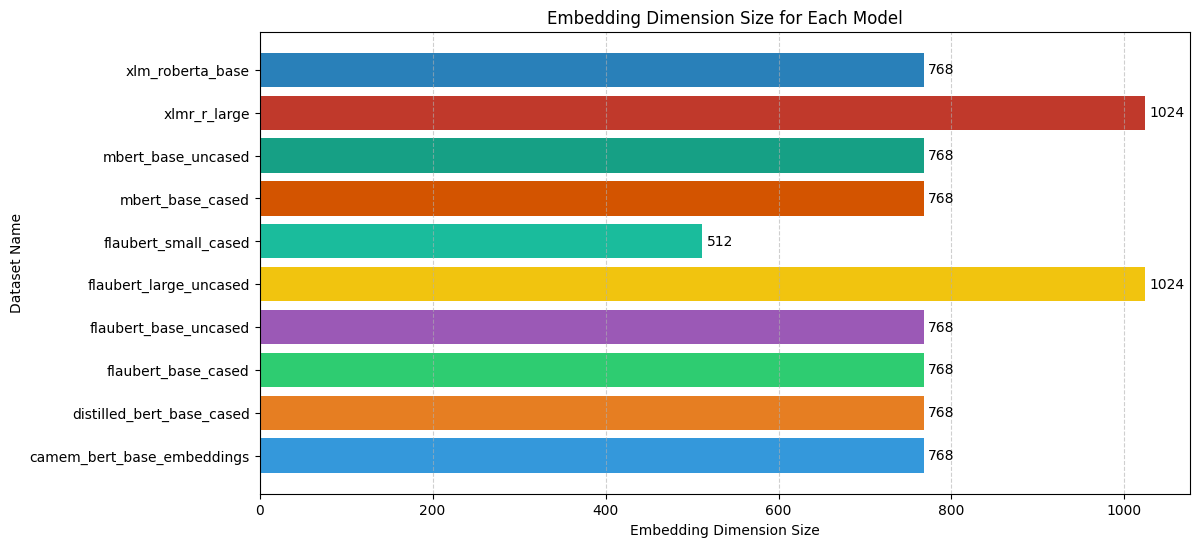

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Define alternating colors
bar_colors = ["#3498db", "#e67e22", "#2ecc71", "#9b59b6", "#f1c40f", "#1abc9c", "#d35400", "#16a085", "#c0392b", "#2980b9"]

# Function to plot embedding dimension length with alternating colors
def plot_embedding_dimensions(dataframes):
    dataset_names = []
    embedding_sizes = []

    # Extract embedding sizes
    for name, df in dataframes.items():
        # The number of embedding dimensions is the total columns minus the "Word" and "Gender" columns
        if "Gender" in df.columns and "Word" in df.columns:
            embedding_size = df.shape[1] - 2  # Subtract "Word" and "Gender" columns
        else:
            embedding_size = df.shape[1] - 1  # If "Gender" is missing, assume only "Word" is non-embedding

        dataset_names.append(name)
        embedding_sizes.append(embedding_size)

    # Create horizontal bar chart
    y_positions = np.arange(len(dataset_names))  # Y-axis positions

    plt.figure(figsize=(12, 6))

    # Plot bars with alternating colors
    for i, (name, size) in enumerate(zip(dataset_names, embedding_sizes)):
        plt.barh(y_positions[i], size, color=bar_colors[i % len(bar_colors)])  # Alternate colors
        plt.text(size + 5, y_positions[i], str(size), va="center", fontsize=10, color="black")

    # Labels and Title
    plt.xlabel("Embedding Dimension Size")
    plt.ylabel("Dataset Name")
    plt.title("Embedding Dimension Size for Each Model")
    plt.yticks(y_positions, dataset_names)  # Set dataset names on y-axis
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

# Call the function to plot embedding dimension lengths
plot_embedding_dimensions(dataframes)


### 2.4 Class Distribution and Balancing

Showing  French Nouns Original Gender Distribution:


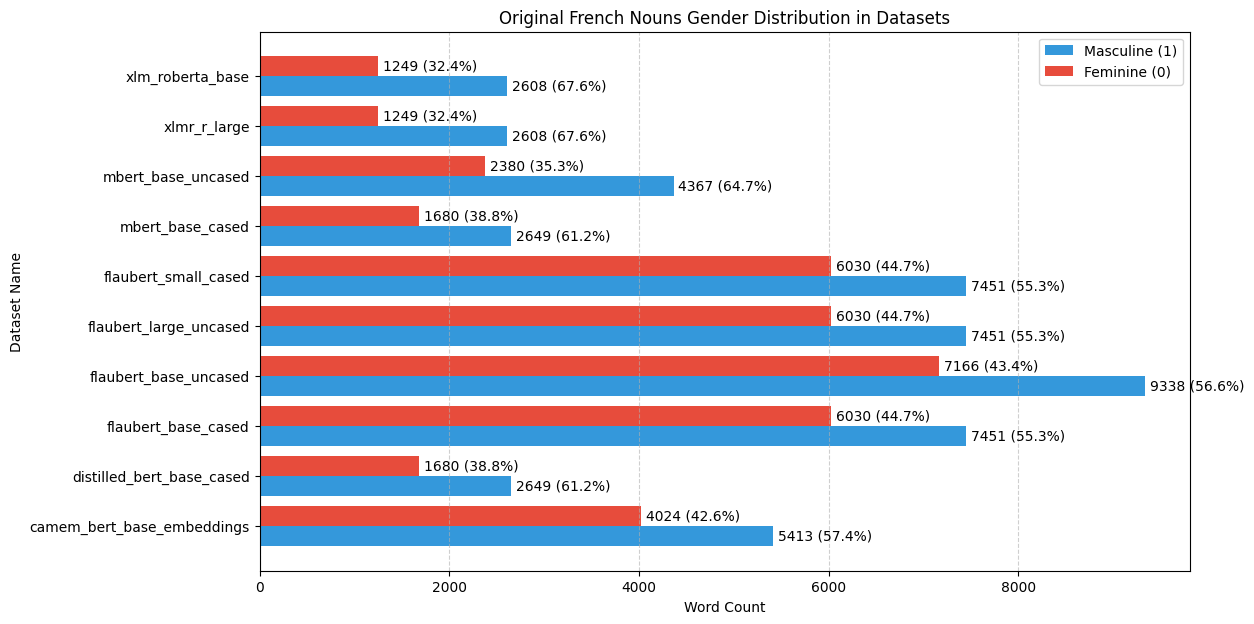

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot gender distribution as a horizontal bar chart
def plot_gender_distribution_bar_chart(dataframes, title="Gender Distribution in Datasets"):
    dataset_names = []
    masculine_counts = []
    feminine_counts = []
    total_counts = []

    # Extract gender counts for each dataset
    for name, df in dataframes.items():
        if "Gender" in df.columns:
            gender_counts = df["Gender"].value_counts()
            dataset_names.append(name)
            masculine_count = gender_counts.get(1, 0)  # Count Masculine (1)
            feminine_count = gender_counts.get(0, 0)  # Count Feminine (0)
            total_count = masculine_count + feminine_count  # Total words

            masculine_counts.append(masculine_count)
            feminine_counts.append(feminine_count)
            total_counts.append(total_count)

    # Convert counts to percentages
    masculine_percentages = [round((m / t) * 100, 1) if t > 0 else 0 for m, t in zip(masculine_counts, total_counts)]
    feminine_percentages = [round((f / t) * 100, 1) if t > 0 else 0 for f, t in zip(feminine_counts, total_counts)]

    # Bar width
    bar_width = 0.4
    y_positions = np.arange(len(dataset_names))  # Y-axis positions

    # Create figure
    plt.figure(figsize=(12, 7))

    # Plot bars for Masculine and Feminine
    plt.barh(y_positions - bar_width/2, masculine_counts, height=bar_width, label="Masculine (1)", color="#3498db")
    plt.barh(y_positions + bar_width/2, feminine_counts, height=bar_width, label="Feminine (0)", color="#e74c3c")

    # Add data labels (both count and percentage) on bars
    for i, (m_count, f_count, m_percent, f_percent) in enumerate(zip(masculine_counts, feminine_counts, masculine_percentages, feminine_percentages)):
        plt.text(m_count + 50, y_positions[i] - bar_width/2, f"{m_count} ({m_percent}%)", va="center", fontsize=10, color="black")
        plt.text(f_count + 50, y_positions[i] + bar_width/2, f"{f_count} ({f_percent}%)", va="center", fontsize=10, color="black")

    # Labels and Title
    plt.xlabel("Word Count")
    plt.ylabel("Dataset Name")
    plt.title(title)
    plt.yticks(y_positions, dataset_names)  # Set dataset names on y-axis
    plt.legend()
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

# Show original distribution
print("Showing  French Nouns Original Gender Distribution:")
plot_gender_distribution_bar_chart(dataframes, title="Original French Nouns Gender Distribution in Datasets")


Showing French Nouns Gender Distribution After Undersampling:


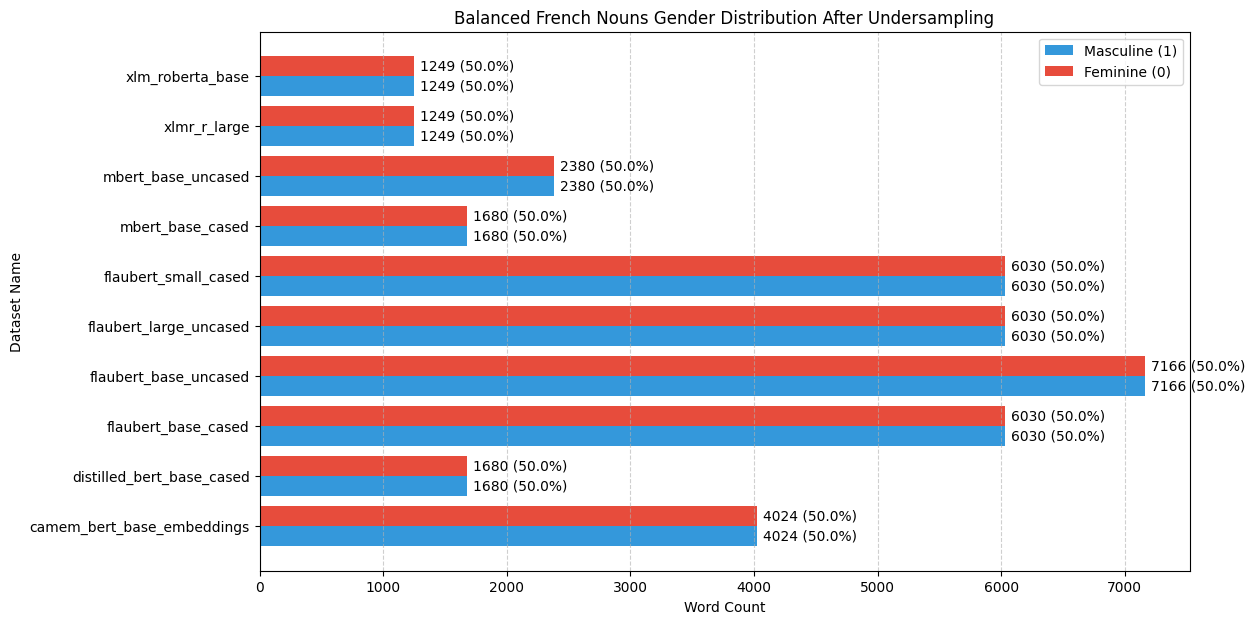

In [24]:
# Apply undersampling (reduce larger class to match smaller class)
balanced_dataframes = {}
for name, df in dataframes.items():
    if "Gender" in df.columns:
        masculine_df = df[df["Gender"] == 1]
        feminine_df = df[df["Gender"] == 0]

        # Find the smaller class size
        min_class_size = min(len(masculine_df), len(feminine_df))

        # Randomly sample from both classes
        masculine_sampled = masculine_df.sample(min_class_size, random_state=42)
        feminine_sampled = feminine_df.sample(min_class_size, random_state=42)

        # Concatenate and shuffle
        balanced_df = pd.concat([masculine_sampled, feminine_sampled]).sample(frac=1, random_state=42)

        # Store the balanced dataset
        balanced_dataframes[name] = balanced_df

# Show distribution after balancing
print("\nShowing French Nouns Gender Distribution After Undersampling:")
plot_gender_distribution_bar_chart(balanced_dataframes, title="Balanced French Nouns Gender Distribution After Undersampling")


# Step 3) Train a Simple Perceptron (Baseline on all Embeddings)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# Set dataset size percentage for training
dataset_percentage = 99  # Change this to adjust dataset sampling size from each dataset

# Dictionary to store model performance
model_accuracies = {}

# Dictionary to store trained models and test data
trained_models = {}
test_data = {}

# Loop through each dataset and train a Perceptron model
for name, df in dataframes.items():
    print("-" * 70)
    print(f"\nTraining Perceptron Model on {name} Dataset... ")

    # Ensure dataset has "Gender" and embeddings (excluding "Word" column)
    if "Gender" in df.columns and "Word" in df.columns:
        X = df.drop(columns=["Word", "Gender"]).values  # Feature vectors (embeddings)
        y = df["Gender"].values  # Target labels (0 = Feminine, 1 = Masculine)
    else:
        print(f"Skipping {name} (Missing required columns)")
        continue

    # Select subset based on dataset_percentage
    sample_size = int((dataset_percentage / 100) * len(df))

    # Check if enough samples exist after sampling
    if sample_size < 2:
        print(f"{name} dataset is too small after sampling, skipping...")
        continue

    # Properly sample `sample_size` instances
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=sample_size / len(df), stratify=y, random_state=42)

    # Split into training (80%) and testing (20%)
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

    # Standardize embeddings
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train Perceptron model
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X_train, y_train)

    # Store trained model and test data
    trained_models[name] = perceptron
    test_data[name] = X_test  # Store X_test for SHAP analysis

    # Predictions
    y_pred = perceptron.predict(X_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy  # Store accuracy
    print(f"\nAccuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, target_names=["Feminine (0)", "Masculine (1)"]))


----------------------------------------------------------------------

Training Perceptron Model on camem_bert_base_embeddings Dataset... 

Accuracy: 0.5067
               precision    recall  f1-score   support

 Feminine (0)       0.44      0.56      0.49       797
Masculine (1)       0.59      0.46      0.52      1072

     accuracy                           0.51      1869
    macro avg       0.51      0.51      0.51      1869
 weighted avg       0.52      0.51      0.51      1869

----------------------------------------------------------------------

Training Perceptron Model on distilled_bert_base_cased Dataset... 

Accuracy: 0.6826
               precision    recall  f1-score   support

 Feminine (0)       0.59      0.60      0.60       333
Masculine (1)       0.74      0.73      0.74       524

     accuracy                           0.68       857
    macro avg       0.67      0.67      0.67       857
 weighted avg       0.68      0.68      0.68       857

-------------------

### 3.1 Evaluate Performance of Perceptron (on all available embeddings)

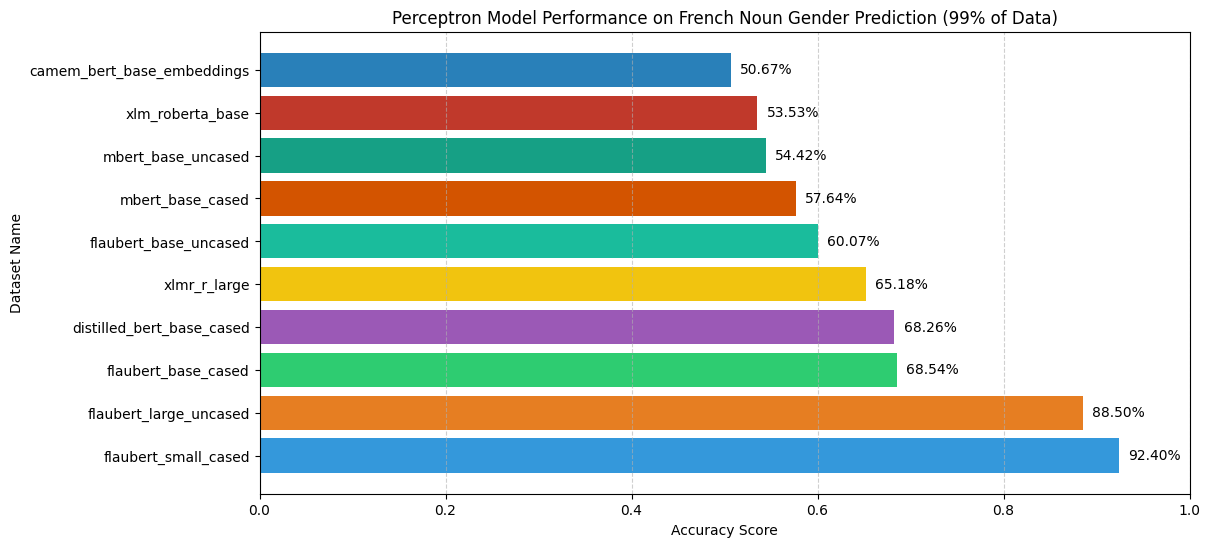

In [26]:
# Sort models by accuracy
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)
model_names, accuracies = zip(*sorted_models)

# Plot Bar Chart
plt.figure(figsize=(12, 6))
bar_colors = ["#3498db", "#e67e22", "#2ecc71", "#9b59b6", "#f1c40f", "#1abc9c", "#d35400", "#16a085", "#c0392b", "#2980b9"]
plt.barh(model_names, accuracies, color=[bar_colors[i % len(bar_colors)] for i in range(len(model_names))])

# Add data labels
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.01, i, f"{acc:.2%}", va="center", fontsize=10, color="black")

# Labels and Title
plt.xlabel("Accuracy Score")
plt.ylabel("Dataset Name")
plt.title(f"Perceptron Model Performance on French Noun Gender Prediction ({dataset_percentage}% of Data)")
plt.xlim(0, 1)  # Accuracy scale from 0 to 1
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Show plot
plt.show()

# Step 4) Applying SHAP to Understand Global Features Importance


--- Processing SHAP Feature Importance for camem_bert_base_embeddings ---


PermutationExplainer explainer: 1870it [58:20,  1.88s/it]                          



--- SHAP Feature Importance Plot for camem_bert_base_embeddings ---


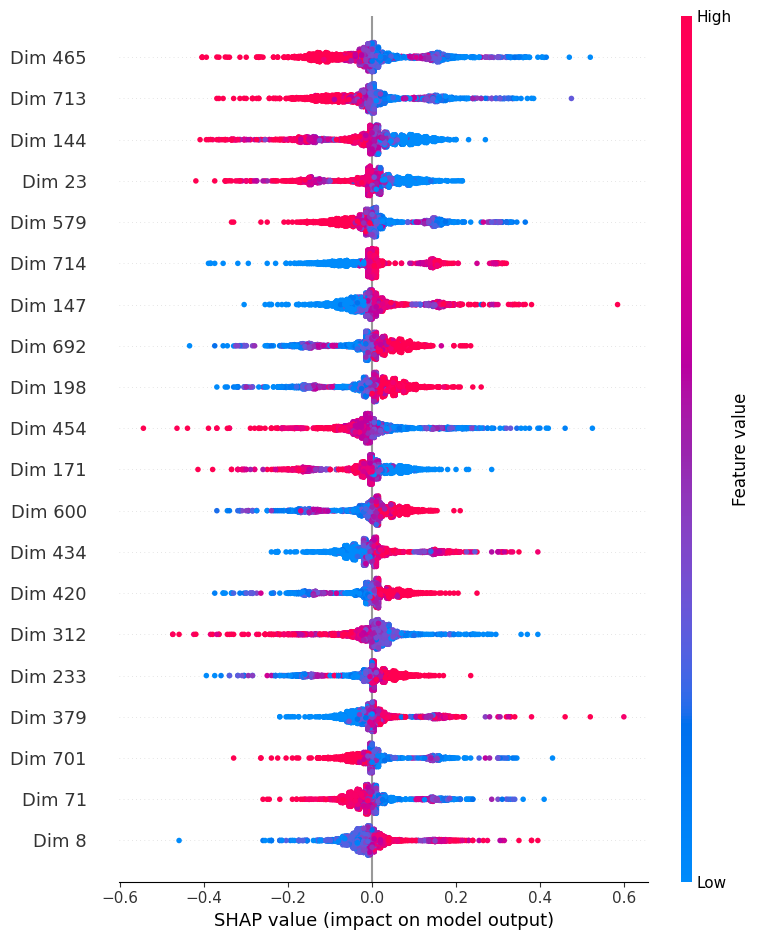


--- Processing SHAP Feature Importance for distilled_bert_base_cased ---


PermutationExplainer explainer: 858it [27:16,  1.92s/it]                         



--- SHAP Feature Importance Plot for distilled_bert_base_cased ---


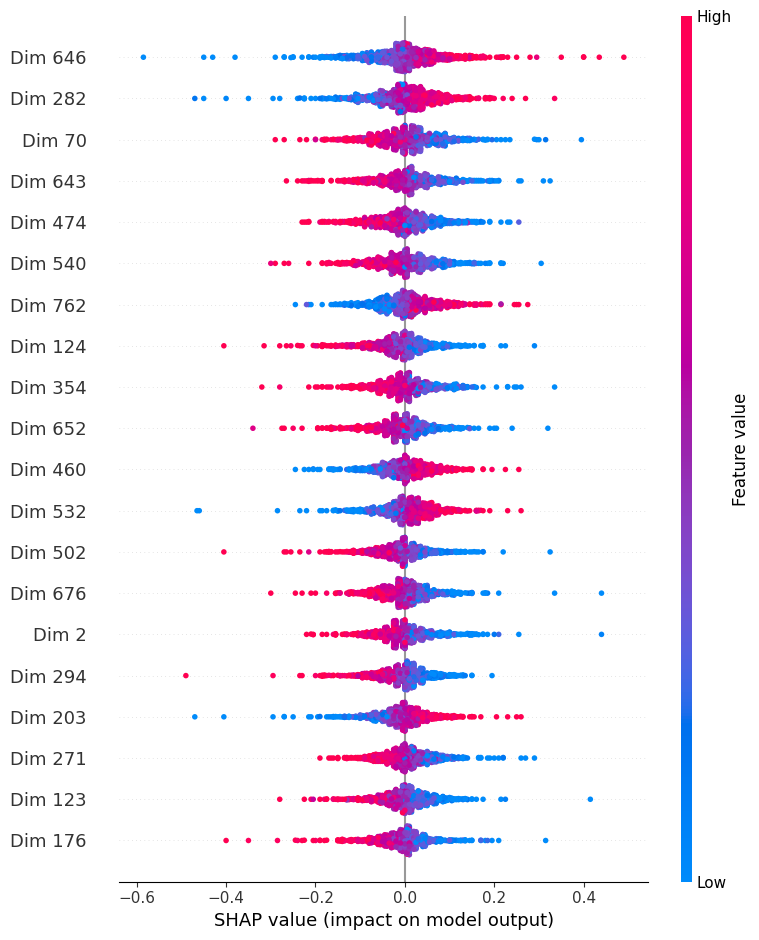


--- Processing SHAP Feature Importance for flaubert_base_cased ---


PermutationExplainer explainer: 2671it [1:31:23,  2.06s/it]                          



--- SHAP Feature Importance Plot for flaubert_base_cased ---


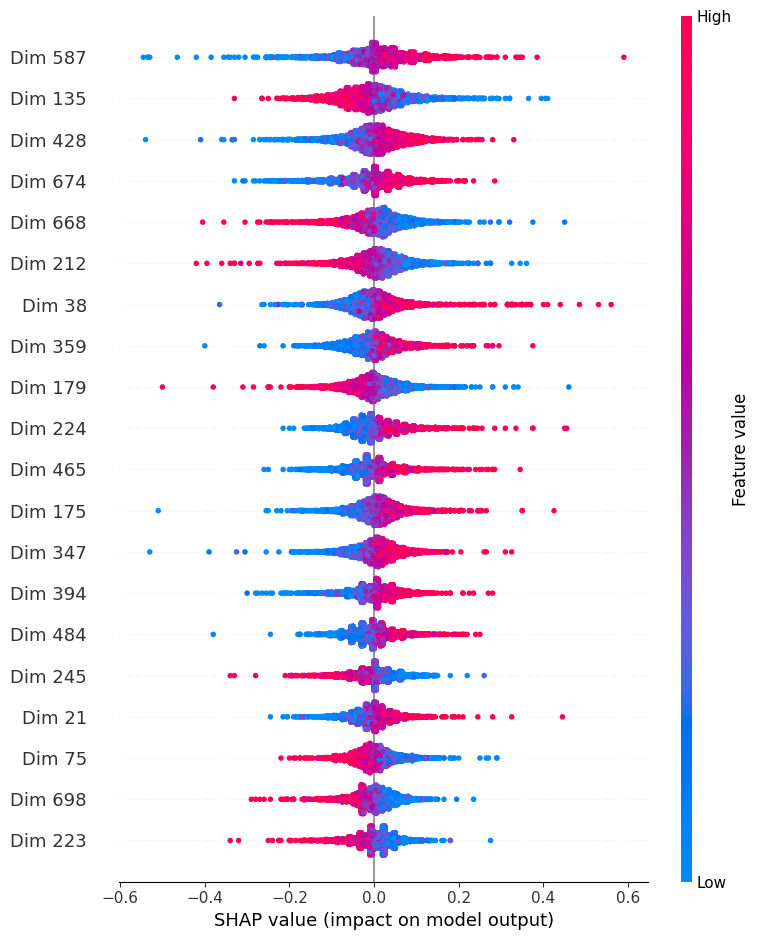


--- Processing SHAP Feature Importance for flaubert_base_uncased ---


PermutationExplainer explainer: 3269it [1:44:51,  1.93s/it]                             



--- SHAP Feature Importance Plot for flaubert_base_uncased ---


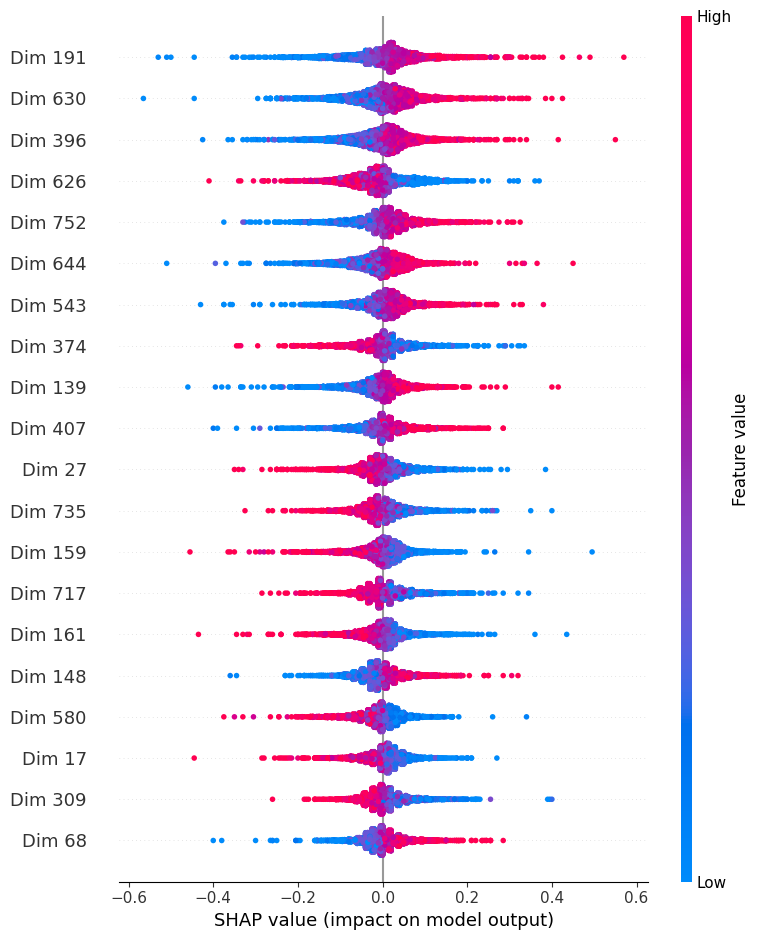


--- Processing SHAP Feature Importance for flaubert_large_uncased ---


PermutationExplainer explainer: 2671it [1:27:53,  1.98s/it]                          



--- SHAP Feature Importance Plot for flaubert_large_uncased ---


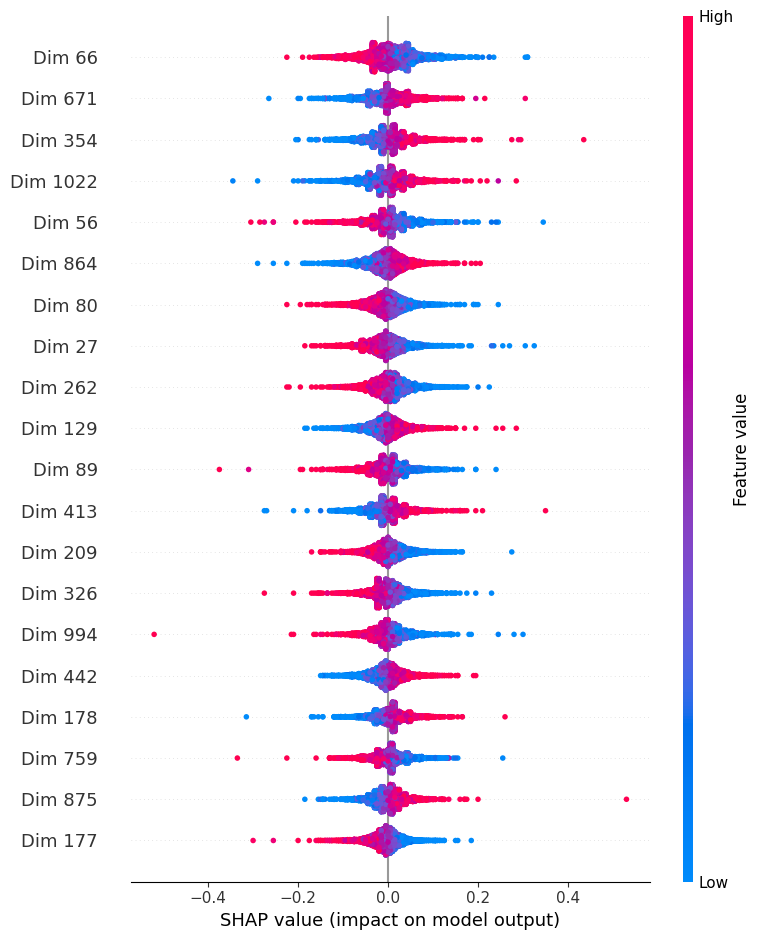


--- Processing SHAP Feature Importance for flaubert_small_cased ---


PermutationExplainer explainer: 2671it [21:48,  2.03it/s]                          



--- SHAP Feature Importance Plot for flaubert_small_cased ---


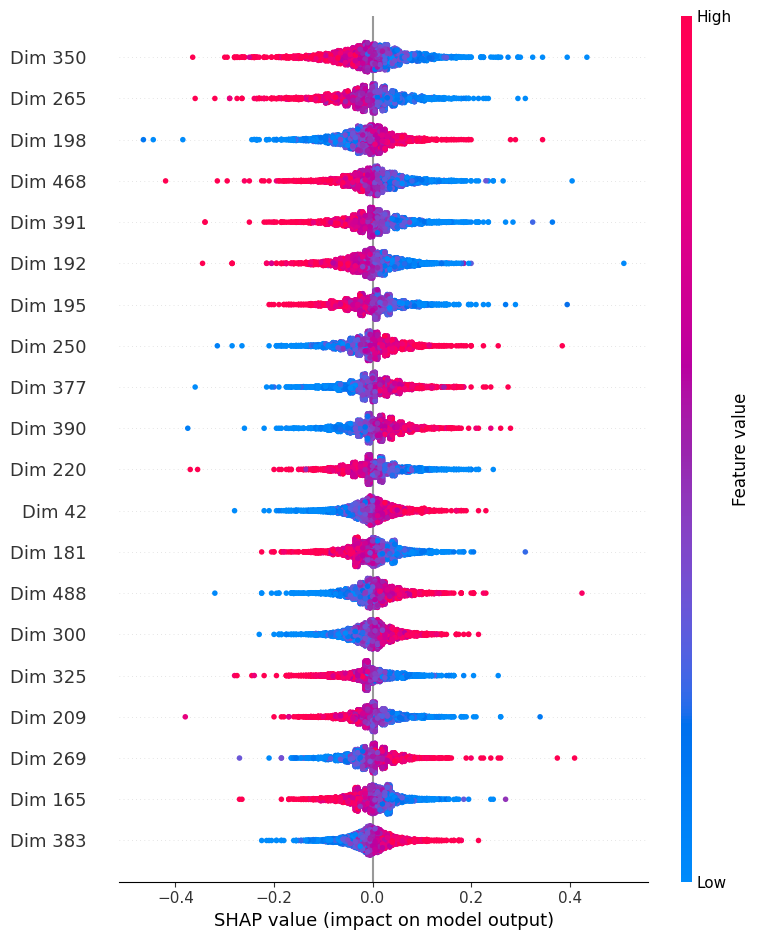


--- Processing SHAP Feature Importance for mbert_base_cased ---


PermutationExplainer explainer: 858it [15:57,  1.13s/it]                         



--- SHAP Feature Importance Plot for mbert_base_cased ---


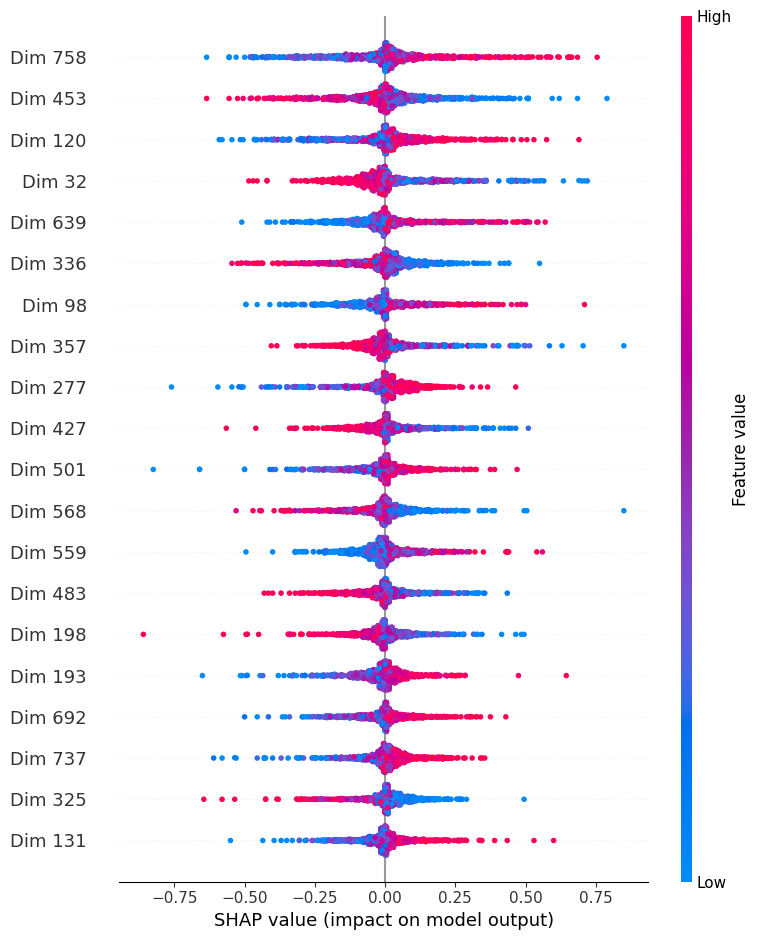


--- Processing SHAP Feature Importance for mbert_base_uncased ---


PermutationExplainer explainer: 1337it [24:44,  1.12s/it]                          



--- SHAP Feature Importance Plot for mbert_base_uncased ---


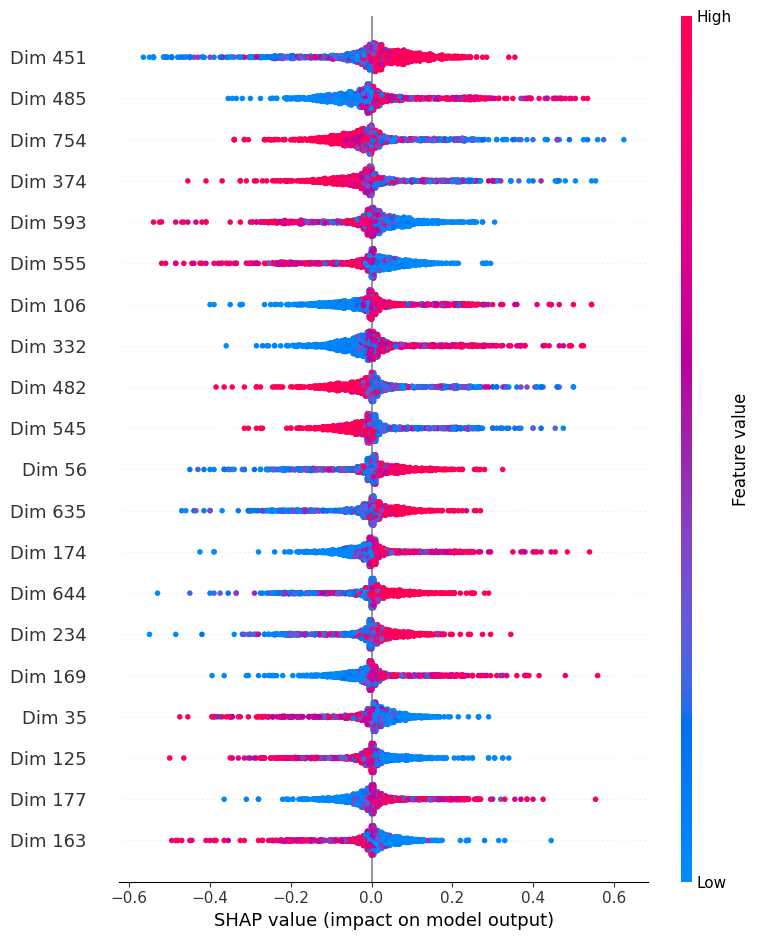


--- Processing SHAP Feature Importance for xlmr_r_large ---


PermutationExplainer explainer: 765it [25:01,  1.98s/it]                         



--- SHAP Feature Importance Plot for xlmr_r_large ---


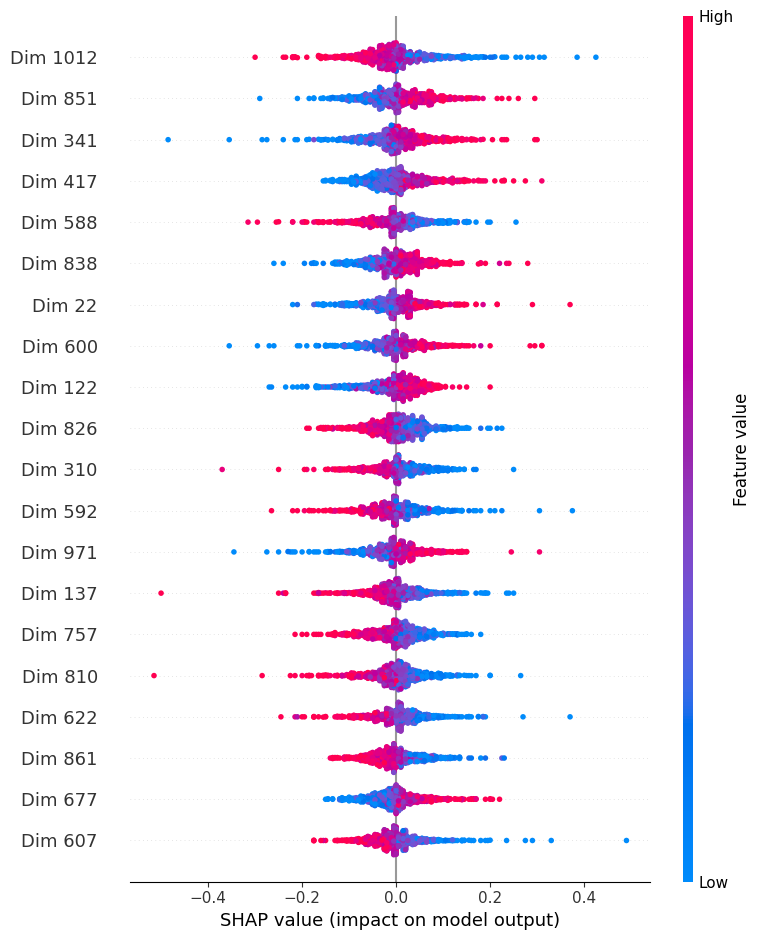


--- Processing SHAP Feature Importance for xlm_roberta_base ---


PermutationExplainer explainer: 765it [14:45,  1.17s/it]                         



--- SHAP Feature Importance Plot for xlm_roberta_base ---


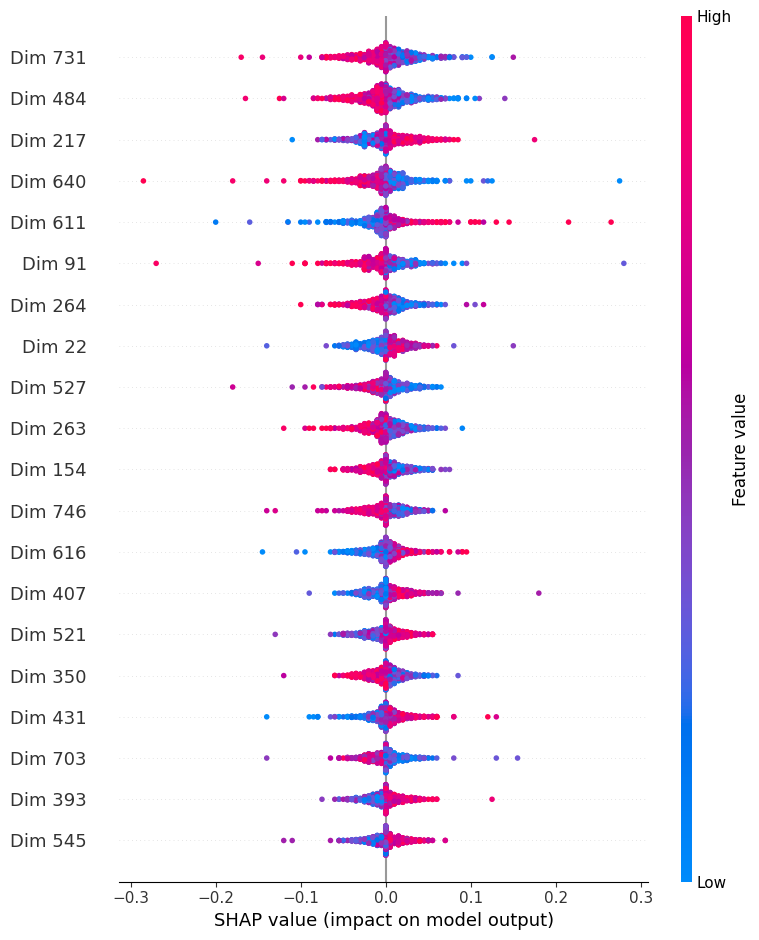

In [27]:
import shap
import numpy as np

# Dictionary to store feature importance for each model
shap_feature_dict = {}

# Loop through trained models and apply SHAP
for name in trained_models.keys():
    print(f"\n--- Processing SHAP Feature Importance for {name} ---")

    # Retrieve stored X_test for the model
    X_test = test_data[name]  # Use the stored test dataset
    perceptron = trained_models[name]  # Use the already trained model

    # Get embedding dimension length dynamically
    embedding_dim = X_test.shape[1]

    # Apply SHAP
    explainer = shap.Explainer(perceptron.predict, X_test)
    shap_values = explainer(X_test, max_evals=embedding_dim * 2 + 1)

    # Compute mean absolute SHAP values per feature
    mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

    # Store feature importance for this model
    shap_feature_dict[name] = mean_abs_shap_values

    # Plot SHAP summary for this model
    print(f"\n--- SHAP Feature Importance Plot for {name} ---")
    shap.summary_plot(shap_values, X_test, feature_names=[f"Dim {i}" for i in range(embedding_dim)])


### 4.1 Saving SHAP Feature Importance Results

In [28]:
import pandas as pd
import numpy as np

# Find the maximum embedding dimension across all models
max_embedding_dim = max(len(v) for v in shap_feature_dict.values())

# Ensure all feature importance arrays have the same length by padding with NaN
for model in shap_feature_dict.keys():
    current_length = len(shap_feature_dict[model])
    if current_length < max_embedding_dim:
        shap_feature_dict[model] = np.pad(
            shap_feature_dict[model], (0, max_embedding_dim - current_length), constant_values=np.nan
        )

# Convert SHAP results into a single DataFrame
shap_feature_importance_all = pd.DataFrame(shap_feature_dict)

# Add feature column names
shap_feature_importance_all.insert(0, "Feature", [f"Dim {i}" for i in range(max_embedding_dim)])

# Sort by highest importance (mean across all models)
shap_feature_importance_all["Mean Importance"] = shap_feature_importance_all.iloc[:, 1:].mean(axis=1)
shap_feature_importance_all = shap_feature_importance_all.sort_values(by="Mean Importance", ascending=False)

# Save to a single CSV file
csv_filename = "shap_feature_importance_all_models.csv"
shap_feature_importance_all.to_csv(csv_filename, index=False)
print(f"\n--- SHAP feature importance saved to {csv_filename} ---")

# Display the table
print("\n--- SHAP Feature Importance Table (Top 50 Features) ---")
display(shap_feature_importance_all.head(50))  # Show the top 50 most important features



--- SHAP feature importance saved to shap_feature_importance_all_models.csv ---

--- SHAP Feature Importance Table (Top 50 Features) ---


,Feature,camem_bert_base_embeddings,distilled_bert_base_cased,flaubert_base_cased,flaubert_base_uncased,flaubert_large_uncased,flaubert_small_cased,mbert_base_cased,mbert_base_uncased,xlmr_r_large,xlm_roberta_base,Mean Importance
1012,Dim 1012,NaN,NaN,NaN,NaN,0.017380,NaN,NaN,NaN,0.052533,NaN,0.034956
971,Dim 971,NaN,NaN,NaN,NaN,0.018363,NaN,NaN,NaN,0.039607,NaN,0.028985
453,Dim 453,0.005313,0.013851,0.021146,0.025093,0.010345,0.026715,0.107030,0.038046,0.019581,0.001145,0.026827
934,Dim 934,NaN,NaN,NaN,NaN,0.024552,NaN,NaN,NaN,0.028338,NaN,0.026445
198,Dim 198,0.052400,0.013961,0.006006,0.029648,0.010734,0.043431,0.062678,0.012758,0.022906,0.001636,0.025616
897,Dim 897,NaN,NaN,NaN,NaN,0.022577,NaN,NaN,NaN,0.028527,NaN,0.025552
838,Dim 838,NaN,NaN,NaN,NaN,0.008361,NaN,NaN,NaN,0.041754,NaN,0.025058
875,Dim 875,NaN,NaN,NaN,NaN,0.025991,NaN,NaN,NaN,0.023102,NaN,0.024546
873,Dim 873,NaN,NaN,NaN,NaN,0.022009,NaN,NaN,NaN,0.026682,NaN,0.024346
851,Dim 851,NaN,NaN,NaN,NaN,0.000406,NaN,NaN,NaN,0.048024,NaN,0.024215


# Step 5) Retrain Perceptron Using Selected SHAP Dimensions

### 5.1 Select Top N% (5, 10, 15) Features from SHAP Importance

In [29]:
import pandas as pd
import numpy as np

# Load the SHAP feature importance results
shap_feature_importance_all = pd.read_csv("shap_feature_importance_all_models.csv")

# Dictionary to store selected feature sets for each model
top_features_dict = {}

# Define top SHAPE feature selection percentages
percentages = [10, 20, 30]

# Loop through each model's SHAP importance values
for model_name in shap_feature_importance_all.columns[1:-1]:  # Exclude 'Feature' and 'Mean Importance'
    print(f"\n--- Selecting Features for {model_name} ---")

    # Get the total number of features (dimensions)
    total_features = len(shap_feature_importance_all)

    # Sort feature importance values in descending order
    sorted_features = shap_feature_importance_all[["Feature", model_name]].sort_values(by=model_name, ascending=False)

    # Store top feature sets for different percentages
    top_features_dict[model_name] = {}

    for percent in percentages:
        num_features = int((percent / 100) * total_features)  # Compute top N features
        selected_features = sorted_features["Feature"].head(num_features).tolist()  # Extract top feature names
        top_features_dict[model_name][percent] = selected_features  # Store in dictionary

print("\n--- Feature Selection Completed ---")



--- Selecting Features for camem_bert_base_embeddings ---

--- Selecting Features for distilled_bert_base_cased ---

--- Selecting Features for flaubert_base_cased ---

--- Selecting Features for flaubert_base_uncased ---

--- Selecting Features for flaubert_large_uncased ---

--- Selecting Features for flaubert_small_cased ---

--- Selecting Features for mbert_base_cased ---

--- Selecting Features for mbert_base_uncased ---

--- Selecting Features for xlmr_r_large ---

--- Selecting Features for xlm_roberta_base ---

--- Feature Selection Completed ---


### 5.2 Retrain Perceptrons Using Top N% SHAP Features

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store new model performance
new_model_accuracies = {}

# Loop through each model and retrain using selected features
for model_name, feature_sets in top_features_dict.items():
    print(f"\n--- Retraining Perceptron for {model_name} ---")

    # Retrieve original dataset
    df = dataframes[model_name]

    # Ensure dataset has "Gender" and embeddings
    if "Gender" not in df.columns or "Word" not in df.columns:
        print(f"Skipping {model_name} (Missing required columns)")
        continue

    # Extract full feature set
    X_full = df.drop(columns=["Word", "Gender"])
    y = df["Gender"]

    # Ensure dataset column names are strings
    X_full.columns = X_full.columns.astype(str)

    for percent, selected_features in feature_sets.items():
        print(f"\n--- Training with Top {percent}% Features ---")

        # Convert SHAP-selected feature names (e.g., "Dim 302") to match dataset column names
        selected_indices = [int(feature.split(" ")[1]) for feature in selected_features]
        selected_columns = [str(idx) for idx in selected_indices]  # Convert to string to match column names

        # Filter dataset to keep only selected dimensions
        X_selected = X_full[selected_columns].values

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

        # Standardize embeddings
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Train Perceptron model
        perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
        perceptron.fit(X_train, y_train)

        # Predictions
        y_pred = perceptron.predict(X_test)

        # Model Evaluation
        accuracy = accuracy_score(y_test, y_pred)
        new_model_accuracies[(model_name, percent)] = accuracy

        print(f"Accuracy with Top {percent}% Features: {accuracy:.4f}")
        print(classification_report(y_test, y_pred, target_names=["Feminine (0)", "Masculine (1)"]))

print("\n--- Perceptron Training Completed ---")



--- Retraining Perceptron for camem_bert_base_embeddings ---

--- Training with Top 10% Features ---
Accuracy with Top 10% Features: 0.5212
               precision    recall  f1-score   support

 Feminine (0)       0.43      0.39      0.41       805
Masculine (1)       0.58      0.62      0.60      1083

     accuracy                           0.52      1888
    macro avg       0.50      0.50      0.50      1888
 weighted avg       0.51      0.52      0.52      1888


--- Training with Top 20% Features ---
Accuracy with Top 20% Features: 0.5281
               precision    recall  f1-score   support

 Feminine (0)       0.46      0.62      0.53       805
Masculine (1)       0.62      0.46      0.53      1083

     accuracy                           0.53      1888
    macro avg       0.54      0.54      0.53      1888
 weighted avg       0.55      0.53      0.53      1888


--- Training with Top 30% Features ---
Accuracy with Top 30% Features: 0.5387
               precision    recall 

#Step 6) Compare Performance of Baseline Perceptrons vs SHAP %N High Importance Features

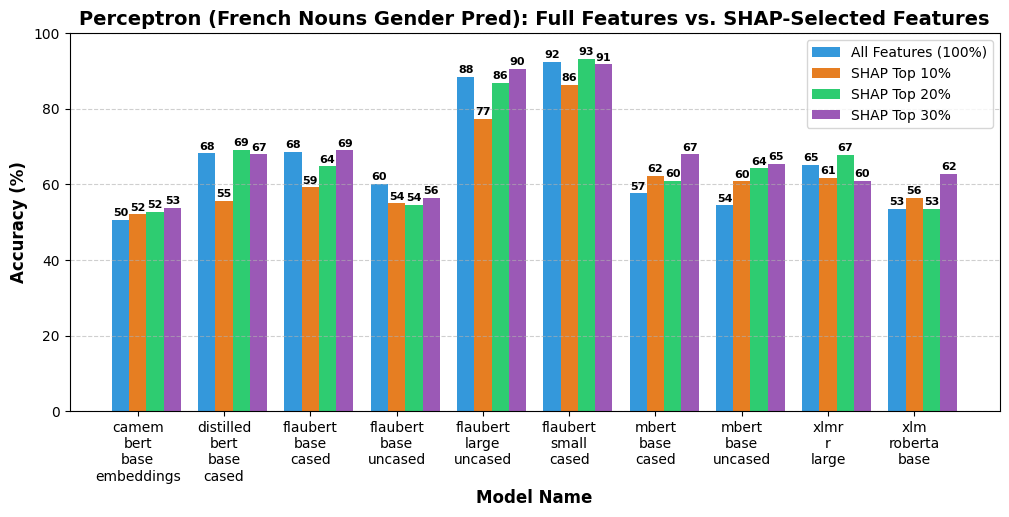

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Extract baseline model accuracy from previous training
baseline_accuracies = {name: model_accuracies[name] for name in trained_models.keys()}

# Convert accuracies to percentages (0-100 scale)
baseline_accuracies = {k: v * 100 for k, v in baseline_accuracies.items()}

# Plot comparison of SHAP-selected vs. full-feature models
plt.figure(figsize=(12, 6))
bar_width = 0.2  # Space between bars
index = np.arange(len(baseline_accuracies))  # Bar positions

# Bar colors
colors = ["#3498db", "#e67e22", "#2ecc71", "#9b59b6"]

# Plot bars for full-feature model
bars = plt.bar(index, baseline_accuracies.values(), bar_width, label="All Features (100%)", color=colors[0])

# Add data labels on baseline bars (rounded to whole numbers)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{int(bar.get_height())}", ha='center', fontsize=8, fontweight='bold')

# Plot bars for SHAP-selected models (5%, 10%, 15% features)
for i, percent in enumerate(percentages):
    shap_accuracies = {name: new_model_accuracies.get((name, percent), 0) * 100 for name in baseline_accuracies.keys()}
    bars = plt.bar(index + (i + 1) * bar_width, shap_accuracies.values(), bar_width, label=f"SHAP Top {percent}%", color=colors[i + 1])

    # Add data labels on each bar (rounded to whole numbers)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f"{int(bar.get_height())}", ha='center', fontsize=8, fontweight='bold')

# Labels and formatting
plt.xlabel("Model Name", fontsize=12, fontweight="bold")
plt.ylabel("Accuracy (%)", fontsize=12, fontweight="bold")
plt.title("Perceptron (French Nouns Gender Pred): Full Features vs. SHAP-Selected Features", fontsize=14, fontweight="bold")

# Fix x-axis labels: Wrap long text into multiple lines
plt.xticks(index + bar_width, [label.replace("_", "\n") for label in baseline_accuracies.keys()], rotation=0, ha='center')

# Adjust bottom margin to prevent labels from getting cut off
plt.subplots_adjust(bottom=0.25)

plt.legend()
plt.ylim(0, 100)  # Ensures percentage scale
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()


# Step 7) LIME-Based Feature Selection & Model Training

## 7.1 Install & Import Required Libraries

In [32]:
!pip install lime  # Install LIME if not already installed

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


### 7.2 Apply LIME to Identify Important Features

In [33]:
# Set dataset percentage for word selection (for LIME)
word_percentages = [1]  # LIME selection at 5%, 10%, 15% word samples

# Dictionary to store LIME feature importance for each model and percentage
lime_feature_importance = {}

# Loop through each trained model
for name, df in dataframes.items():
    print("-" * 70)
    print(f"\nApplying LIME for {name}...")

    # Ensure dataset has "Gender" and "Word" columns
    if "Gender" in df.columns and "Word" in df.columns:
        X_full = df.drop(columns=["Word", "Gender"])  # Feature embeddings
        y_full = df["Gender"]  # Labels (0 = Feminine, 1 = Masculine)
    else:
        print(f"Skipping {name} (Missing required columns)")
        continue

    # Use stored test data and trained model from previous training
    X_test = test_data[name]
    perceptron = trained_models[name]

    for percent in word_percentages:
        num_samples = int((percent / 100) * len(df))
        # Ensure class balance when selecting words
        masculine_samples = df[df["Gender"] == 1].sample(num_samples // 2, random_state=42)
        feminine_samples = df[df["Gender"] == 0].sample(num_samples // 2, random_state=42)
        sampled_df = pd.concat([masculine_samples, feminine_samples]).sample(frac=1, random_state=42)

        X_sample = sampled_df.drop(columns=["Word", "Gender"]).values
        y_sample = sampled_df["Gender"].values

        # Define LIME explainer with feature names in the format "Dim i"
        explainer = lime.lime_tabular.LimeTabularExplainer(
            X_sample,
            feature_names=[f"Dim {i}" for i in range(X_sample.shape[1])],
            class_names=["Feminine", "Masculine"],
            mode="classification"
        )

        # Define a wrapper function for Perceptron that returns a probability-like output
        def perceptron_predict(X):
            scores = perceptron.decision_function(X)
            # Convert decision scores into a two-column output:
            # first column: indicator if score > 0, second: indicator if score <= 0.
            return np.column_stack([(scores > 0).astype(int), (scores <= 0).astype(int)])

        # Initialize feature importance array for this percentage sample
        feature_importance = np.zeros(X_sample.shape[1])

        # Explain each randomly selected instance in the sample using LIME
        for i in range(len(X_sample)):
            exp = explainer.explain_instance(X_sample[i], perceptron_predict, num_features=X_sample.shape[1])
            for feat, importance in exp.as_list():
                # Use regex to extract the number after "Dim"
                match = re.search(r"Dim\s*(\d+)", feat)
                if match:
                    dim_index = int(match.group(1))
                    if dim_index < X_sample.shape[1]:
                        feature_importance[dim_index] += abs(importance)
                    else:
                        print(f"Skipping feature '{feat}': index {dim_index} out of bounds for {X_sample.shape[1]} dimensions.")
                else:
                    print(f"Skipping invalid feature: {feat}")

        # Normalize aggregated importance by the number of instances explained
        feature_importance /= len(X_sample)
        lime_feature_importance[(name, percent)] = feature_importance


print("\nLIME feature importance has been computed and stored in memory.")

----------------------------------------------------------------------

Applying LIME for camem_bert_base_embeddings...
----------------------------------------------------------------------

Applying LIME for distilled_bert_base_cased...
----------------------------------------------------------------------

Applying LIME for flaubert_base_cased...
----------------------------------------------------------------------

Applying LIME for flaubert_base_uncased...
----------------------------------------------------------------------

Applying LIME for flaubert_large_uncased...
----------------------------------------------------------------------

Applying LIME for flaubert_small_cased...
----------------------------------------------------------------------

Applying LIME for mbert_base_cased...
----------------------------------------------------------------------

Applying LIME for mbert_base_uncased...
----------------------------------------------------------------------

Applying 

Save LIME Feature Imoprtance

In [34]:
# Find the max embedding dimension across models (since some models may have 768, others 1024)
max_dim = max([len(v) for v in lime_feature_importance.values()])

# Create a DataFrame with proper alignment
lime_feature_importance_df = pd.DataFrame(index=[f"Dim {i}" for i in range(max_dim)])

# Populate the DataFrame with LIME results
for (name, percent), feature_importance in lime_feature_importance.items():
    # Ensure feature importance array has the correct length by padding with zeros if necessary
    padded_feature_importance = np.zeros(max_dim)
    padded_feature_importance[:len(feature_importance)] = feature_importance  # Fill available values
    lime_feature_importance_df[(name, percent)] = padded_feature_importance

# Save the LIME feature importance data to a CSV file
lime_feature_importance_df.to_csv("lime_feature_importance_all_models.csv", index=True)

print("\nLIME feature importance saved to 'lime_feature_importance_all_models.csv'")
display(lime_feature_importance_df)


LIME feature importance saved to 'lime_feature_importance_all_models.csv'


,"(camem_bert_base_embeddings, 1)","(distilled_bert_base_cased, 1)","(flaubert_base_cased, 1)","(flaubert_base_uncased, 1)","(flaubert_large_uncased, 1)","(flaubert_small_cased, 1)","(mbert_base_cased, 1)","(mbert_base_uncased, 1)","(xlmr_r_large, 1)","(xlm_roberta_base, 1)"
Dim 0,0.013925,0.005983,0.012370,0.019074,0.011425,0.012511,0.0,0.016796,0.000084,0.0
Dim 1,0.025022,0.010357,0.015995,0.013978,0.012045,0.012298,0.0,0.016507,0.000091,0.0
Dim 2,0.013153,0.017594,0.027113,0.021994,0.010257,0.025812,0.0,0.013349,0.000093,0.0
Dim 3,0.015289,0.008120,0.015632,0.017206,0.012873,0.021776,0.0,0.012940,0.000062,0.0
Dim 4,0.011512,0.008155,0.015627,0.019182,0.015790,0.019761,0.0,0.011371,0.000088,0.0
...,...,...,...,...,...,...,...,...,...,...
Dim 1019,0.000000,0.000000,0.000000,0.000000,0.011327,0.000000,0.0,0.000000,0.000109,0.0
Dim 1020,0.000000,0.000000,0.000000,0.000000,0.015120,0.000000,0.0,0.000000,0.000061,0.0
Dim 1021,0.000000,0.000000,0.000000,0.000000,0.012012,0.000000,0.0,0.000000,0.000101,0.0
Dim 1022,0.000000,0.000000,0.000000,0.000000,0.053458,0.000000,0.0,0.000000,0.000125,0.0


### 7.3 Select Top N% Important Features & Retrain Perceptron

In [35]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# User-specified top LIME % feature selection percentages (independent of word sampling)
feature_selection_percentages = [10, 30, 40]

# Dictionary to store new model accuracies using LIME-selected features
lime_model_accuracies = {}

# Loop through each dataset and retrain using LIME-selected features
for name, df in dataframes.items():
    print("-" * 70)
    print(f"\nRetraining Perceptron using LIME-selected features for {name}...")

    # Get full dataset (features and labels)
    X_full = df.drop(columns=["Word", "Gender"])
    y_full = df["Gender"]

    # Gather all available LIME percentages for this model from the LIME CSV columns
    available_percents = set()
    for col in lime_feature_importance_df.columns:
        if col == "Feature":
            continue
        # Expecting col as a tuple: (model_name, percent)
        if isinstance(col, tuple):
            model_in_col, percent_in_col = col
        else:
            col_str = col.strip("()")
            parts = col_str.split(",")
            if len(parts) != 2:
                continue
            model_in_col = parts[0].strip()
            try:
                percent_in_col = int(parts[1].strip())
            except ValueError:
                continue
        if model_in_col == name:
            available_percents.add(percent_in_col)
    available_percents = sorted(list(available_percents))
    if not available_percents:
        print(f"No LIME results available for {name}; skipping retraining.")
        continue
    print(f"Available LIME percentages for {name}: {available_percents}")

    # Choose a base LIME result.
    base_percent = available_percents[0]
    base_key = (name, base_percent)
    if base_key not in lime_feature_importance_df.columns:
        print(f"Base LIME result for {name} with {base_percent}% not found; skipping.")
        continue
    # Use the base LIME importance vector for ranking features
    base_feature_importance = lime_feature_importance_df[base_key].values

    # For each user-specified feature-selection percentage, select top features and retrain
    for fs_percent in feature_selection_percentages:
        # Determine number of features to select from the full feature set.
        num_features = int((fs_percent / 100) * X_full.shape[1])
        if num_features < 1:
            print(f"Skipping {name} with {fs_percent}% features (Too few features selected)")
            continue

        # IMPORTANT: If the base LIME vector length is less than full dimension, use the minimum.
        L = min(len(base_feature_importance), X_full.shape[1])
        # Use only the first L columns of X_full (to align with the base LIME vector)
        X_full_subset = X_full.iloc[:, :L]
        # Get indices of top features based on the base LIME importance vector
        top_features = np.argsort(base_feature_importance[:L])[-num_features:]

        # Select only these top features from the subset
        X_selected = X_full_subset.iloc[:, top_features].values

        # Train-test split (80% train, 20% test, stratified)
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y_full, test_size=0.2, stratify=y_full, random_state=42)

        # Standardize features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Train a new Perceptron on the reduced feature set
        perceptron_reduced = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
        perceptron_reduced.fit(X_train, y_train)

        # Evaluate the model
        y_pred = perceptron_reduced.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        lime_model_accuracies[(name, fs_percent)] = accuracy
        print(f"Accuracy for {name} (LIME Top {fs_percent}% features): {accuracy:.4f}")


----------------------------------------------------------------------

Retraining Perceptron using LIME-selected features for camem_bert_base_embeddings...
Available LIME percentages for camem_bert_base_embeddings: [1]
Accuracy for camem_bert_base_embeddings (LIME Top 10% features): 0.5132
Accuracy for camem_bert_base_embeddings (LIME Top 30% features): 0.5307
Accuracy for camem_bert_base_embeddings (LIME Top 40% features): 0.5371
----------------------------------------------------------------------

Retraining Perceptron using LIME-selected features for distilled_bert_base_cased...
Available LIME percentages for distilled_bert_base_cased: [1]
Accuracy for distilled_bert_base_cased (LIME Top 10% features): 0.5889
Accuracy for distilled_bert_base_cased (LIME Top 30% features): 0.6559
Accuracy for distilled_bert_base_cased (LIME Top 40% features): 0.6952
----------------------------------------------------------------------

Retraining Perceptron using LIME-selected features for flaube

### 7.4  Performance of All Features vs. LIME-Selected Features

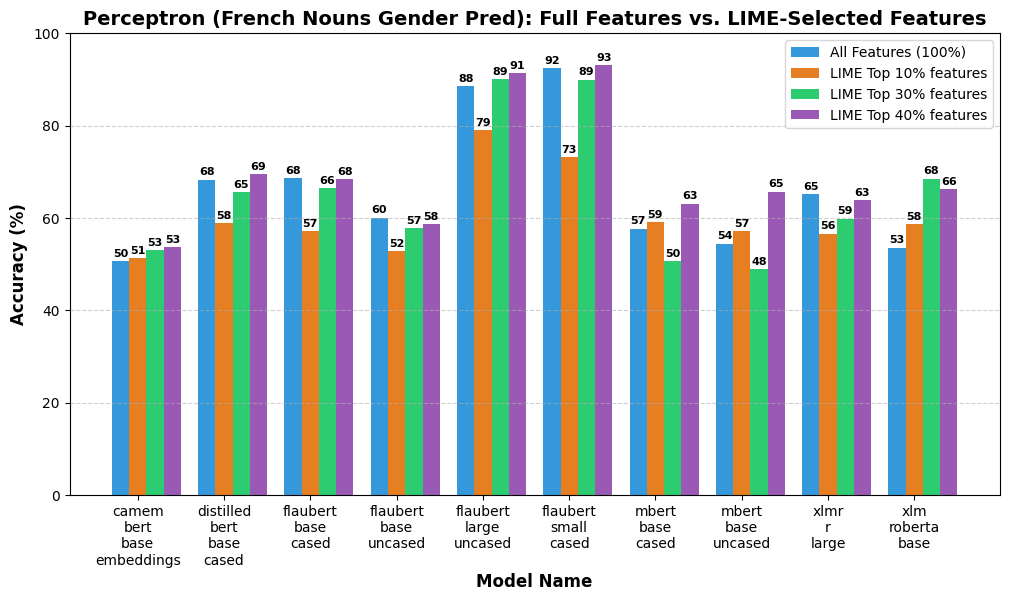

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Convert baseline (full features) model accuracies to percentages (0-100 scale)
baseline_accuracies = {name: model_accuracies[name] * 100 for name in trained_models.keys()}

plt.figure(figsize=(12, 6))
bar_width = 0.2  # Space between bars
index = np.arange(len(baseline_accuracies))  # Positions for each model

# Define bar colors (expand as needed)
colors = ["#3498db", "#e67e22", "#2ecc71", "#9b59b6", "#f1c40f", "#1abc9c"]

# Plot baseline bars (full features)
bars = plt.bar(index, baseline_accuracies.values(), bar_width, label="All Features (100%)", color=colors[0])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{int(bar.get_height())}", ha='center', fontsize=8, fontweight='bold')

# Group LIME-selected model accuracies by user-specified feature selection percentage
lime_percent_accuracies = {}
for (model_name, fs_percent), acc in lime_model_accuracies.items():
    if model_name not in baseline_accuracies:
        continue
    if fs_percent not in lime_percent_accuracies:
        lime_percent_accuracies[fs_percent] = {}
    lime_percent_accuracies[fs_percent][model_name] = acc * 100  # Convert to percentage

sorted_fs_percents = sorted(lime_percent_accuracies.keys())

# Plot bars for each LIME feature-selection percentage group
for i, fs_percent in enumerate(sorted_fs_percents):
    # Ensure the order of models matches baseline_accuracies keys
    acc_values = [lime_percent_accuracies[fs_percent].get(model, 0) for model in baseline_accuracies.keys()]
    bars = plt.bar(index + (i + 1) * bar_width, acc_values, bar_width, label=f"LIME Top {fs_percent}% features", color=colors[i + 1])
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f"{int(bar.get_height())}", ha='center', fontsize=8, fontweight='bold')

plt.xlabel("Model Name", fontsize=12, fontweight="bold")
plt.ylabel("Accuracy (%)", fontsize=12, fontweight="bold")
plt.title("Perceptron (French Nouns Gender Pred): Full Features vs. LIME-Selected Features", fontsize=14, fontweight="bold")
plt.xticks(index + bar_width, [label.replace("_", "\n") for label in baseline_accuracies.keys()], rotation=0, ha='center')
plt.legend()
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()
